In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [13]:
data = pd.read_csv('cleaned_data.csv')

In [18]:
# Impute missing values, for example with the median for numerical data
imputer = SimpleImputer(strategy='median')
data['User-Age'] = imputer.fit_transform(data[['User-Age']])

# Encode categorical variables using LabelEncoder or OneHotEncoder
label_encoder = LabelEncoder()
for column in ['User-City', 'User-State', 'User-Country', 'Book-Author', 'Book-Publisher', 'Series-Title']:
    data[column] = label_encoder.fit_transform(data[column])

# Prepare features and labels
X = data.drop(columns=['User-ID', 'ISBN', 'Book-Title', 'Genre'])
y = label_encoder.fit_transform(data['Genre'])  # Encoding the target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# DECISION TREE

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# More detailed performance analysis
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1404
           1       1.00      1.00      1.00      1401
           2       1.00      1.00      1.00       361
           3       1.00      1.00      1.00       188
           4       1.00      1.00      1.00       188
           5       1.00      1.00      1.00       292
           6       1.00      1.00      1.00       380
           7       0.99      1.00      0.99       212
           8       1.00      1.00      1.00       720

    accuracy                           1.00      5146
   macro avg       1.00      1.00      1.00      5146
weighted avg       1.00      1.00      1.00      5146



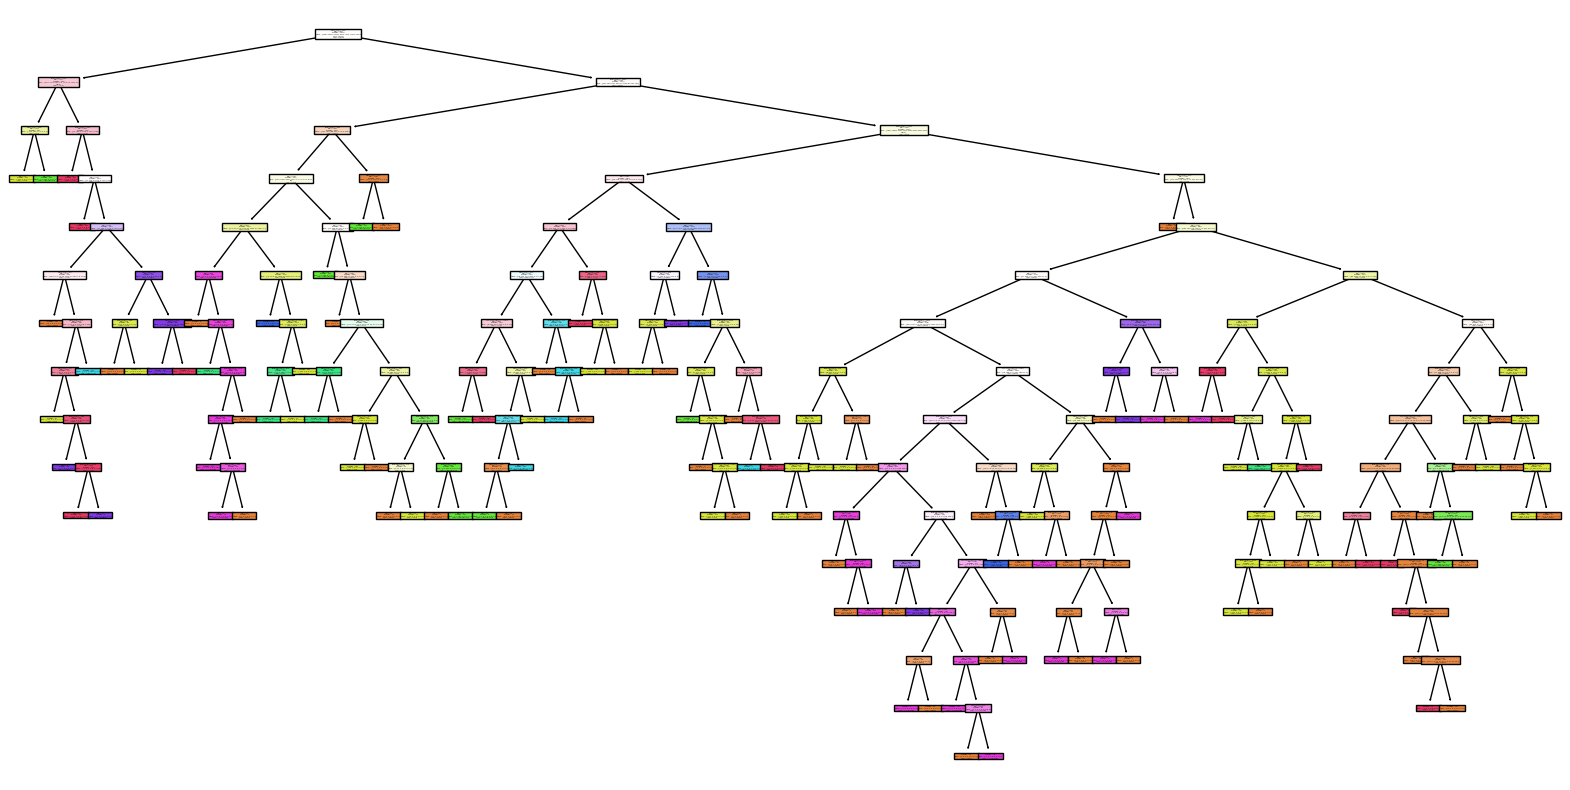

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.show()


In [10]:
data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,User-City,User-State,User-Country,User-Age,Series-Title,Genre
0,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,torrance,california,United States,33.0,painted house,Fiction
1,276788,0345443683,8,"Blackwood Farm (Rice, Anne, Vampire Chronicles.)",ANNE RICE,2003,Ballantine Books,mentone,california,United States,33.0,vampire chronicles,Horror
2,276788,043935806X,7,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,mentone,california,United States,33.0,harry potter,Fantasy
3,276796,0330332775,5,Bridget Jones's Diary,Helen Fielding,1997,Picador (UK),manchester,england,United Kingdom,21.0,bridget jones,Romance
4,276798,3548603203,6,Artemis Fowl.,Eoin Colfer,2003,Ullstein TB-Vlg,mannheim,baden-wuerttemberg,Germany,31.0,artemis fowl,Fantasy
